## Project Overview
This project aims to analyse Black Friday sales data to uncover insights and trends that can inform future marketing strategies, inventory management, and customer relationship management. Black Friday, traditionally the day after Thanksgiving in the United States, is renowned for its significant sales and consumer spending. This analysis will delve into the patterns and behaviors exhibited by consumers during this period, providing valuable insights for retailers and marketers.

## Objectives
Objective of this project is to take out insights from the Black Friday Sale - Dataset . Here we have cleaned the data firstly and then analysed it using Python and its libraries , data is visualised for better understanding so that , useful insights can be taken out and strategies can be build.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.shape

(537577, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## HANDLING NULL VALUES

In [7]:
# we can drop the rows with null values but it will lead to loss of large amount of data so what we can do is deleting the column product_category_2 & product_category_3

del df["Product_Category_2"]
del df["Product_Category_3"]

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## ANALYSING COLUMNS

In [10]:
df["User_ID"].nunique() 

5891

THERE ARE 5891 UNIQUE CUSTOMER WHO PURCHASED IN BLACK FRIDAY SALE

In [12]:
df["Product_ID"].nunique()

3623

THERE ARE 3623 UNIQUE PRODUCTS WHICH ARE PURCHASED IN BLACK FRIDAY SALE BY 5891 CUSTOMERS

In [14]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

MALES & FEMALES WERE THE ONLY CONSUMERS IN THE BLACK FRIDAY SALE

In [16]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
df['Occupation'].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [18]:
df['City_Category'].unique()


array(['A', 'C', 'B'], dtype=object)

In [19]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Marital_Status'].unique()


array([0, 1], dtype=int64)

In [21]:
df['Product_Category_1'].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

## ANALYSING GENDER

In [23]:
data = pd.DataFrame({'Ratio' : [len(df[df["Gender"]== 'M']) , len(df[df["Gender"]=='F'])]} , index = ["Male","Female"]) 

<Axes: ylabel='Ratio'>

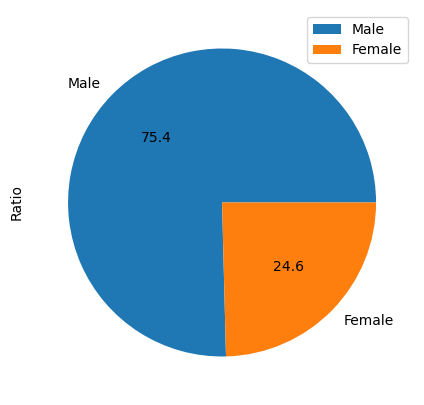

In [24]:
data.plot.pie(y = 'Ratio' , figsize = (6,5) , autopct = "%.1f")

From here we can say that Male customers purchased more nearly 75.4% while Female customers has 24.6% of contribution.


<Axes: title={'center': 'Gender Ratio'}>

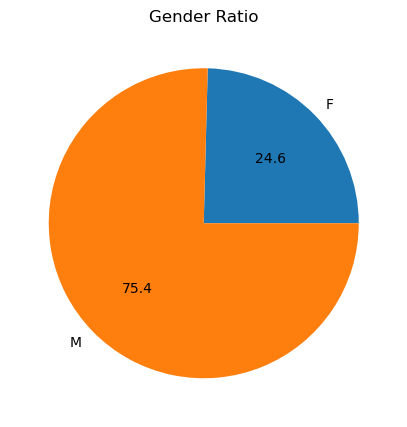

In [25]:
# using groupby

df.groupby("Gender").size().plot(kind = "pie" , autopct = "%.1f" , title = 'Gender Ratio' , figsize = (5,6))

<Axes: xlabel='Gender'>

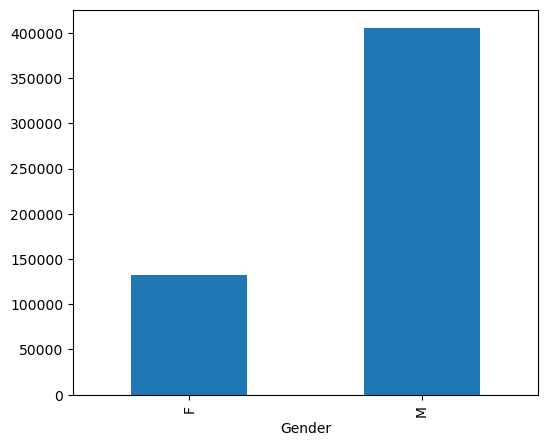

In [26]:
df.groupby("Gender").size().plot(kind = "bar" , figsize = (6,5))

In [27]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

## ANALYSING AGE AND MARITAL STATUS

<Axes: title={'center': 'Purchase Distribution by Age '}, xlabel='Age'>

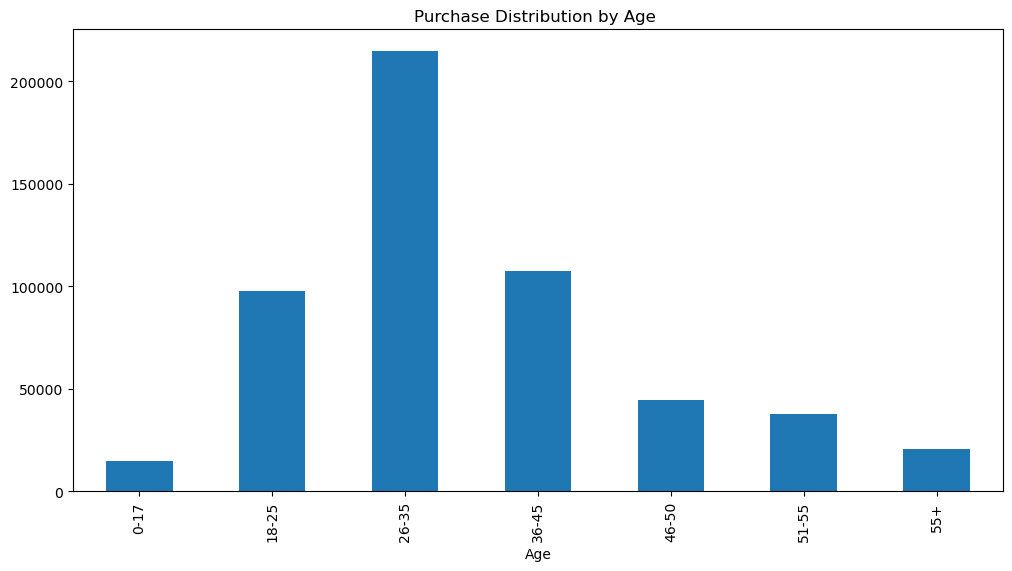

In [29]:
df.groupby('Age').size().plot(kind = 'bar' , figsize = (12,6) , title = 'Purchase Distribution by Age ')

HERE WE CAN CONCLUDE THAT THE AGE GROUP (18-45) ARE THE FREQUENT BUYERS.

<Axes: >

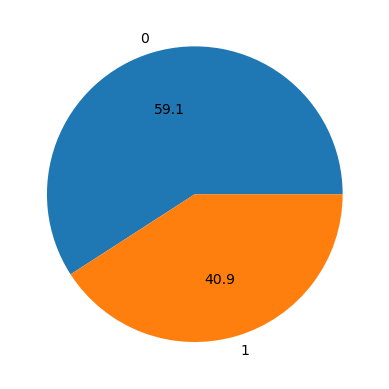

In [31]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')


so , we can conclude that 59.1% of total sales are done by unmarried customers and the rest 40.9% is done by married customers

## MULTI COLUMN ANALYSIS

In [34]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='count'>

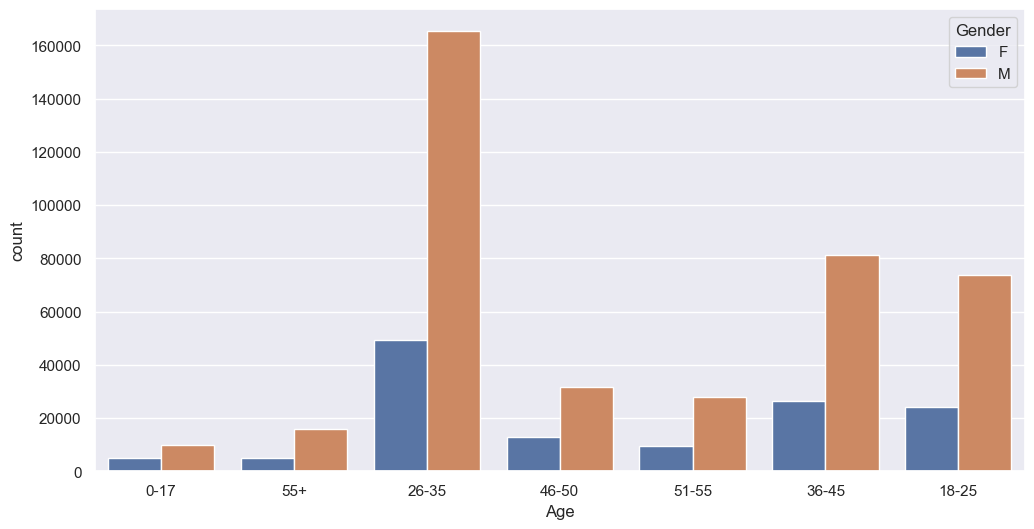

In [35]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age" , hue = "Gender" , data = df)

<Axes: xlabel='Gender', ylabel='count'>

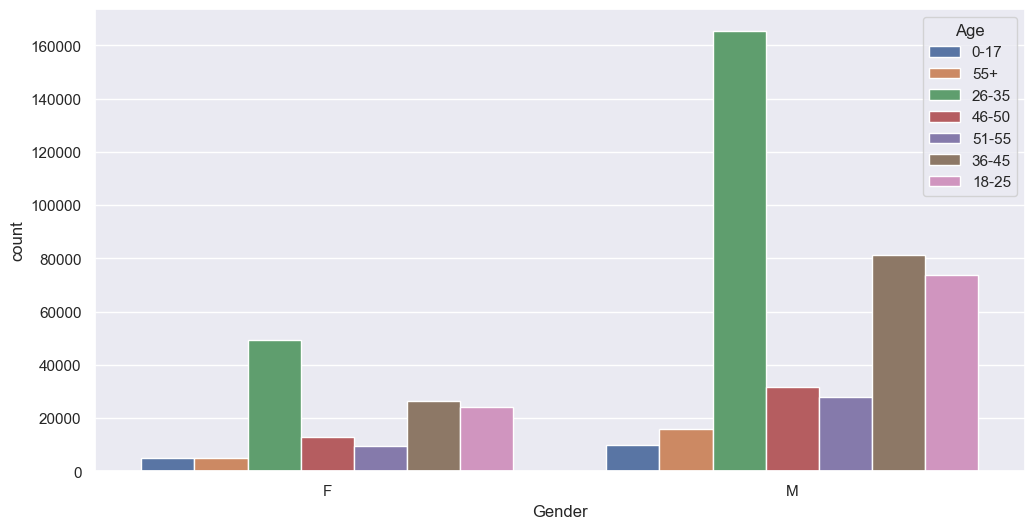

In [36]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

We can actually understand from this that people in the age bracket of (26-35) are the major buyers , after that  (36-45) and (18-25) age brackets follows 

In [37]:
df["Marital_Status"]= df["Marital_Status"].astype(str)

<Axes: xlabel='Gender', ylabel='count'>

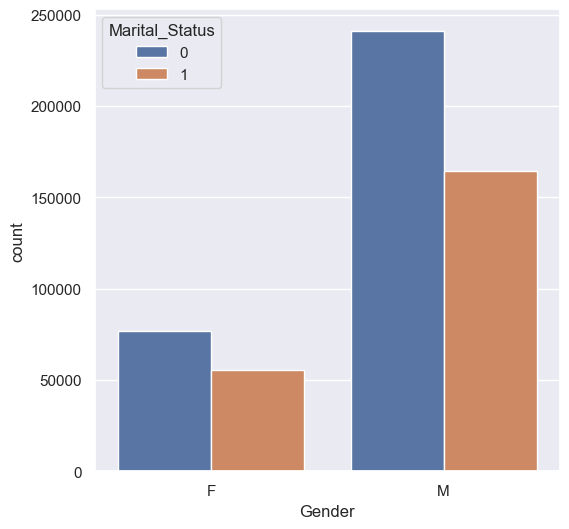

In [38]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

We can conclude that Unmarried people from both male and female side has purchased more than married people .

<Axes: xlabel='City_Category', ylabel='count'>

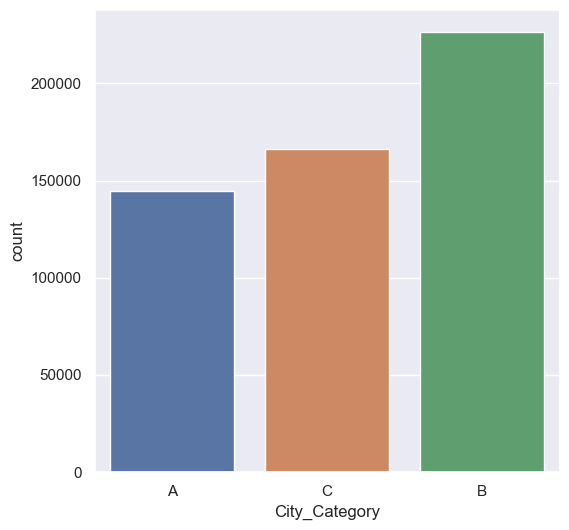

In [39]:
sns.countplot(x = df["City_Category"])

City B has the larget no of buyers .

<Axes: xlabel='City_Category', ylabel='count'>

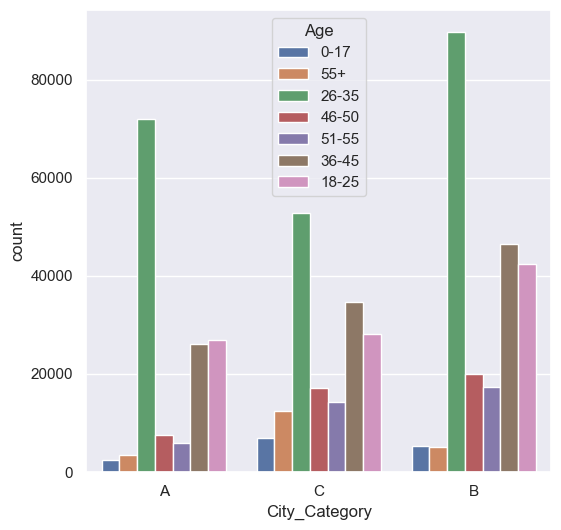

In [40]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)


<Axes: xlabel='Marital_Status', ylabel='count'>

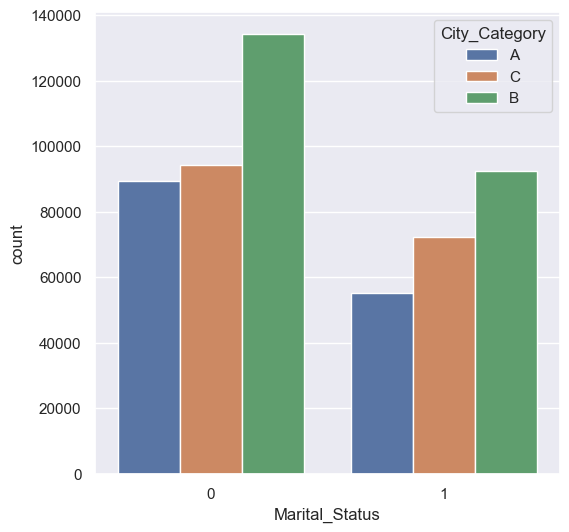

In [41]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)


<Axes: >

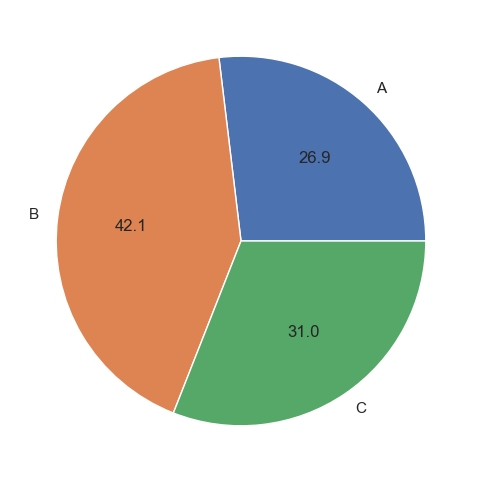

In [42]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')


In [43]:
df_1 = df.groupby("City_Category").sum()['Purchase']


<Axes: ylabel='Purchase'>

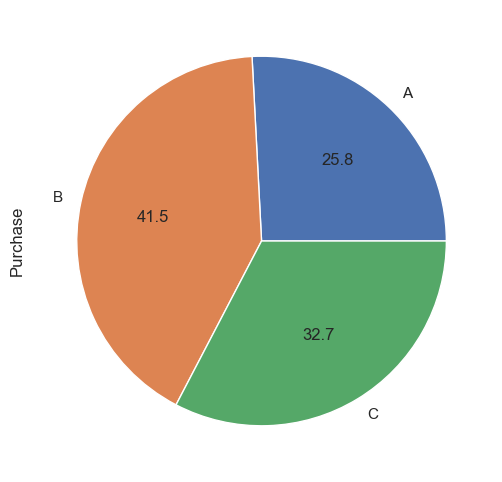

In [44]:
df_1.plot(kind = "pie" , autopct ="%0.1f")

## OCCUPATION AND PRODUCT ANALYSIS

<Axes: xlabel='Occupation', ylabel='count'>

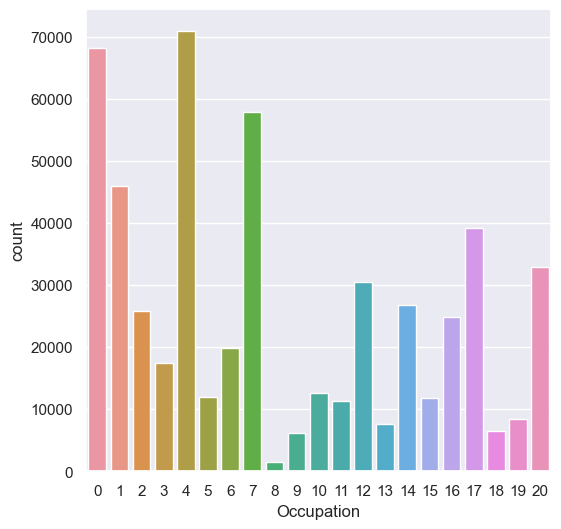

In [117]:
sns.countplot(x = df["Occupation"])

We can conclude that people from occupation : 4,0,7 has purchased the most in the Sale

<Axes: xlabel='Occupation'>

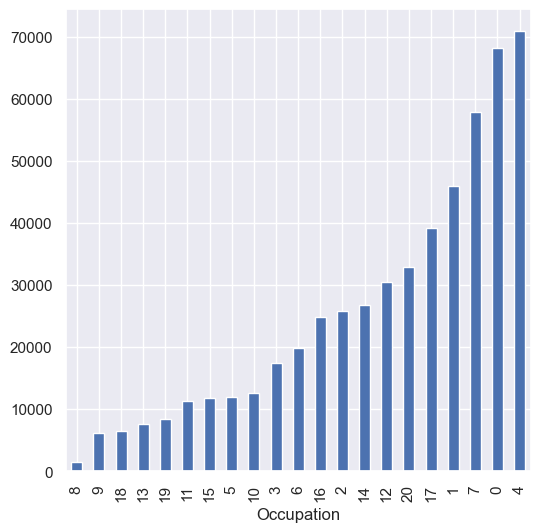

In [47]:
df.groupby("Occupation").size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

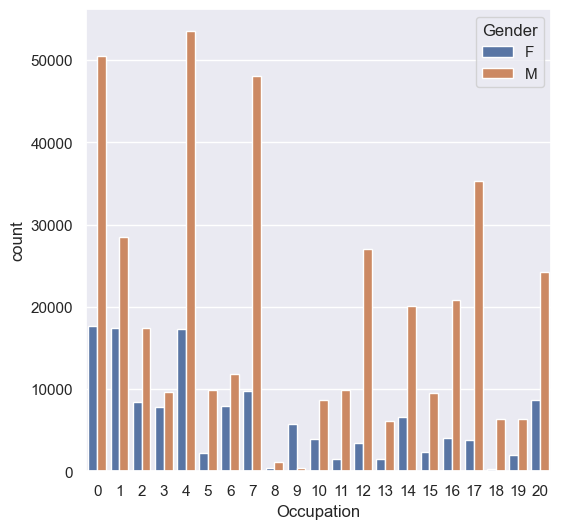

In [48]:
sns.countplot(x = "Occupation" , hue = "Gender" , data = df)

## ANALYSING BY COMBINING AGE AND MARITAL STATUS

In [88]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [90]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<br>M_0 :  Male and unmarried</br>
<br>M_1 :  Male and married</br>
<br>F_0 :  Female and Unmarried</br> 
<br>F_1 :  Female and Married</br>

<Axes: xlabel='MaritalGender', ylabel='count'>

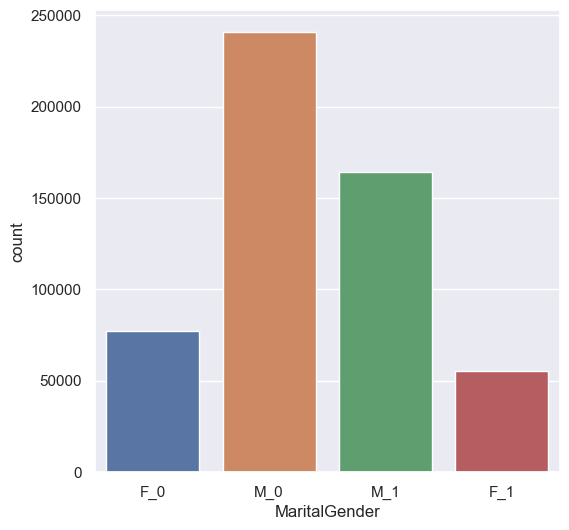

In [92]:
sns.countplot(x = df["MaritalGender"])

Here, we can conclude that that unmarried men has highest number of purchases followed by married men and unmarried women

<Axes: xlabel='Age', ylabel='count'>

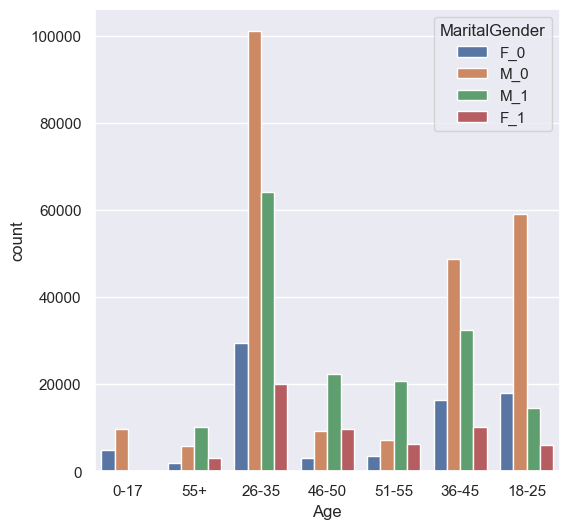

In [94]:
sns.countplot(x = df['Age'] , hue = df['MaritalGender'])

Married and Unmarried female from the age bracket (26-35) has the highest number of purchases than women from other age groups

<Axes: xlabel='Product_Category_1', ylabel='count'>

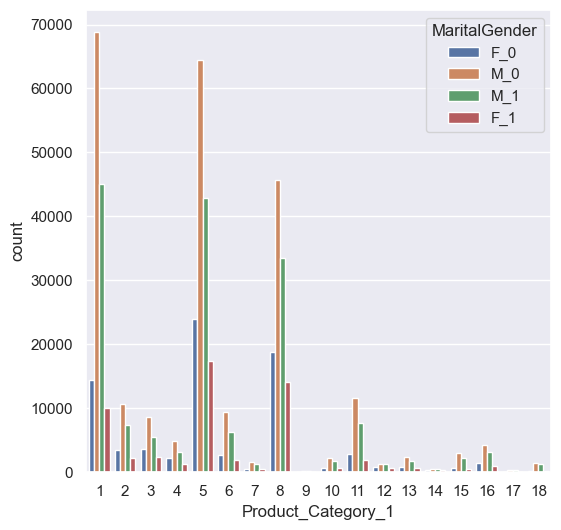

In [123]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

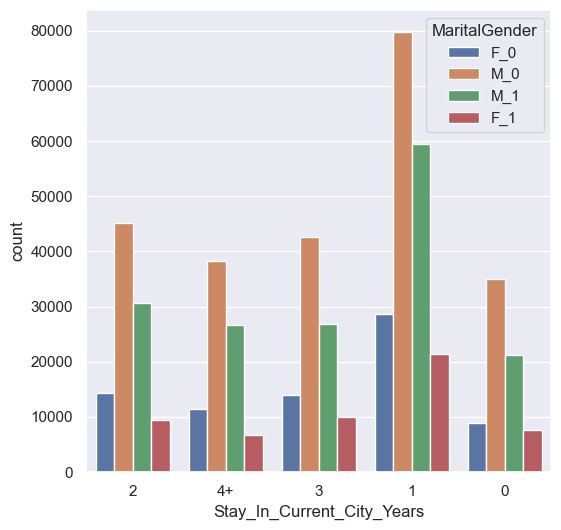

In [98]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])


<Axes: xlabel='City_Category', ylabel='count'>

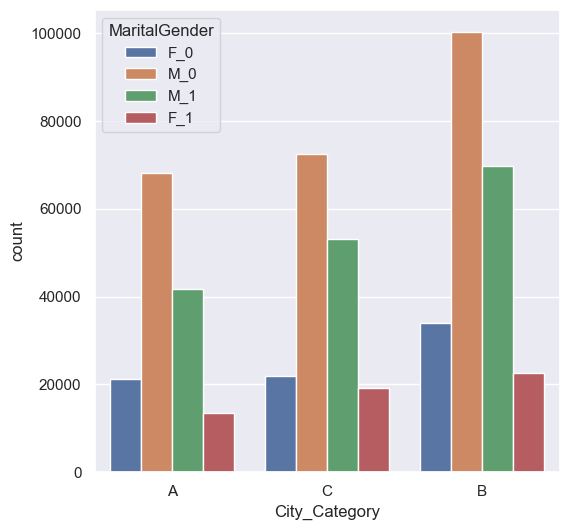

In [100]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])
